## <Center> Ensemble Methods
    
<Center><author> Zander Bonnet
    
<center><Date> September 25, 2024

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [33]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

This data set is a collection of data about the amount of rental bikes being used. The dataset contains data such as the time of day, the type of weather, the day of the week, and so on. The description of the complete data set is printed above. With this data, I hope to accurately predict the number of rental bikes being used at a given time.

I will utilize various ensemble methods to find the most effective approach to accomplish this.

How accurately can I predict the number of rentals at a given time based on the factors in the dataset?

What ensemble method will prove to be the most accurate and efficient?

In [34]:
#drop unwanted column
X = X.drop('dteday', axis = 1)
X.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
dtype: object

In [35]:
#cast the categorical variables to categorical data type
cat = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cat:
    X[col] = X[col].astype('category',copy=False)
X.dtypes

season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
dtype: object

In [36]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [37]:
X.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


In [38]:
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


In [39]:
y.describe()

,cnt
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


In [40]:
#split the data to a train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

### Base Decision Tree

This will serve as a baseline as many of these ensemble models utilize decision trees under the hood.

In [41]:
mod = DecisionTreeRegressor()
mod.fit(X_train, np.ravel(y_train))
pred = mod.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

60.84431909464755


In [42]:
mod.score(X_test,y_test)

0.8838622537155538

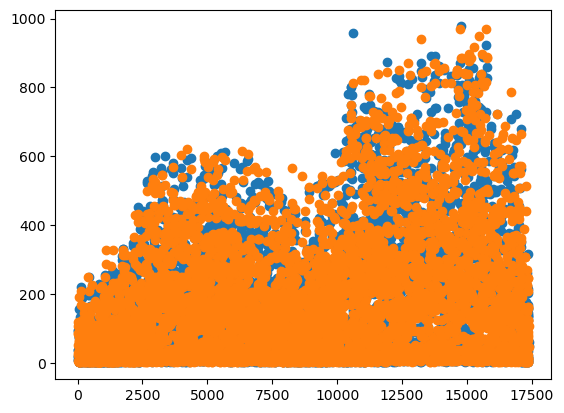

In [43]:
plt.scatter(y_test.index,np.ravel(y_test))
plt.scatter(X_test.index, pred)
plt.show()

This baseline model performs fairly well with an RMSE of 57.86 and an r_2 score of .897. This means the model is about 89% accurate and on average is 57.8 rentals off.

### Bagging

Bagging works by bootstrapping the data into smaller subsets and running models on these individual subsets. These models all run at the same time. After the completion of the smaller models, the bagging algorithm averages the responses to create the final output. 





In [44]:
model0 = BaggingRegressor(DecisionTreeRegressor())
model0.fit(X_train, np.ravel(y_train))
pred_final0 = model0.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_final0)))

47.974797095508585


In [45]:
model0.score(X_test,y_test)

0.927796272803379

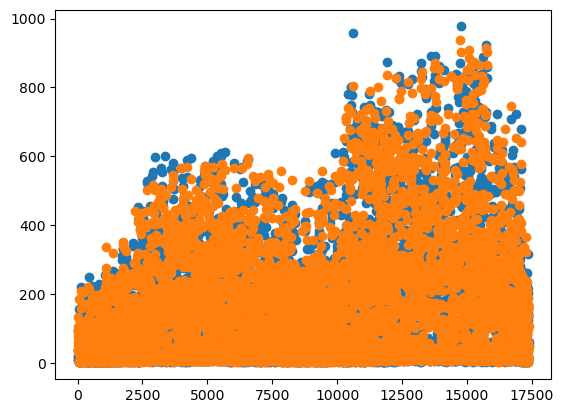

In [46]:
plt.scatter(y_test.index,np.ravel(y_test))
plt.scatter(X_test.index, pred_final0)
plt.show()

Comparing the bagging algorithm to the baseline we can see that there was an overall improvement in the ability to predict the data. The r2_score increased to .936 and the RMSE is now as low as 45. The bagging algorithm was able to reduce the variation in the data by averaging over multiple iterations of models. This will mean that models that are heavily impacted by more extreme data points will be outweighed by the more accurate models.

### Gradient Boosting

GBM is a boosting algorithm, meaning it sequentially creates models that build upon each other. To accomplish this the model creates a base model and then calculates the residuals to the target. There is then a subsequent model created to minimize the residuals. Once a prediction is made it is added to the original prediction and the residuals are recalculated. This continues for the given number of iterations.

In [47]:
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train, np.ravel(y_train))
pred_final = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_final)))

53.60538234459247


In [48]:
model.score(X_test,y_test)

0.9098532405680619

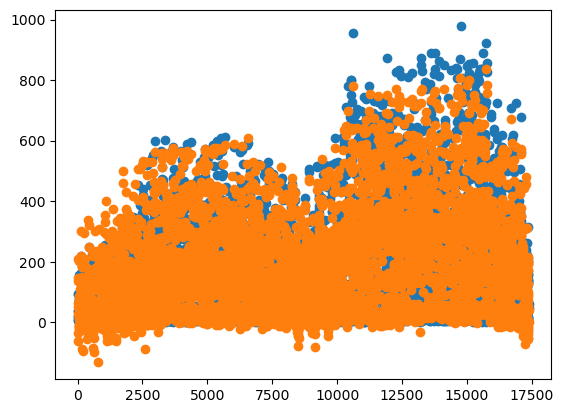

In [49]:
plt.scatter(y_test.index,np.ravel(y_test))
plt.scatter(X_test.index, pred_final)
plt.show()

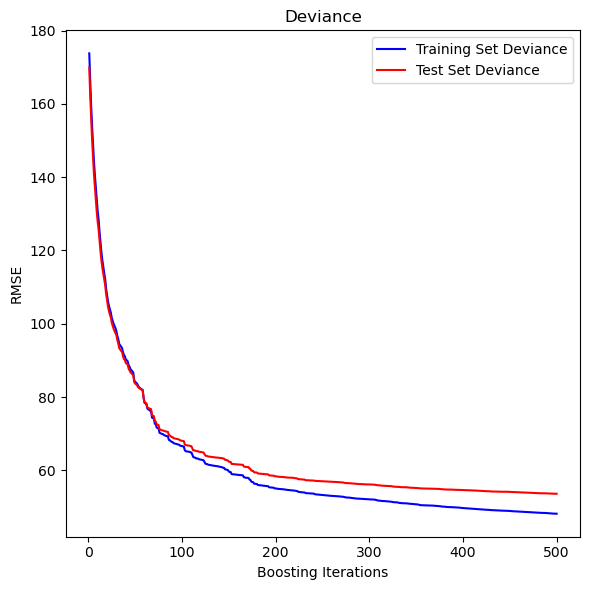

In [50]:
test_score = np.zeros(500, dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = np.sqrt(mean_squared_error(y_test, y_pred))

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(500) + 1,
    np.sqrt(model.train_score_),
    "b-",
    label="Training Set Deviance",
)
plt.plot(np.arange(500) + 1, test_score, "r-", label="Test Set Deviance")
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE")
fig.tight_layout()

This model performs better than the original model, but not as well as the bagging model. With an r_2 score of .918 and an RMSE of 51.8, the model is just slightly worse. Looking at the Deviance we can see that as the iterations pass the RMSE begins to flatten and stabilize. This is a sign that adding more iterations will begin to become less and less beneficial. This model can minimize the variation in predictions by focusing on reducing the residuals.

### XGBoost

XGBoost is a direct improvement of the previous method. It can do this by introducing regularization to the data, tree pruning, and built-in cross-validation. These additions make it so the algorithm doesn't spend as much time on tree nodes that do not improve the performance of the model.

In [51]:
model2=xgb.XGBRegressor(enable_categorical = True)
model2.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose=10)
pred_final2 = model2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_final2)))

[0]	validation_0-rmse:136.60632
[10]	validation_0-rmse:52.69892
[20]	validation_0-rmse:47.00785
[30]	validation_0-rmse:45.74242
[40]	validation_0-rmse:45.40387
[50]	validation_0-rmse:44.83887
[60]	validation_0-rmse:44.82139
[70]	validation_0-rmse:44.50372
[80]	validation_0-rmse:44.36945
[90]	validation_0-rmse:44.26532
[99]	validation_0-rmse:44.26845
44.268451459051924


In [52]:
model2.score(X_test,y_test)

0.938521683216095

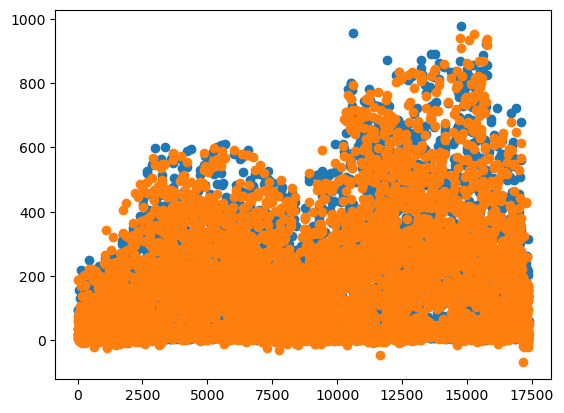

In [53]:
plt.scatter(y_test.index,np.ravel(y_test))
plt.scatter(X_test.index, pred_final2)
plt.show()

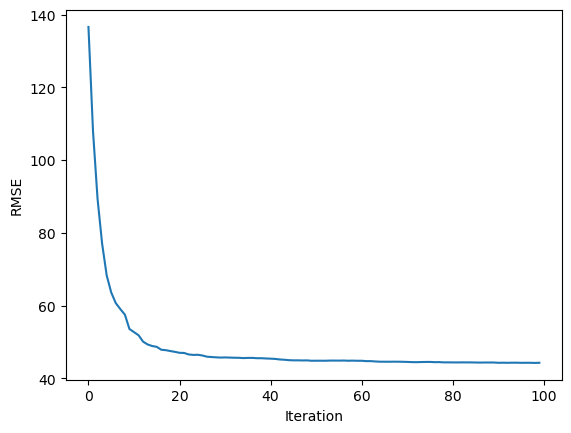

In [54]:
plt.plot(range(100),model2.evals_result_['validation_0']['rmse'])
plt.ylabel('RMSE')
plt.xlabel('Iteration')
plt.show()

This model performs the best so far with an RMSE of 41.3 and a r2_score of .947. This shows that the model performs very well. Looking at the RMSE Vs. Iterations plot we can also see that the model converged very early. There was very minimal improvement in RMSE after about 25 iterations.

### CatBoost

CatBoost is another boosting algorithm, but this one excels in datasets with large amounts of categorical features. It can do this by converting categorical factors to numerical values using a variety of statistical methods.

In [55]:
model3=CatBoostRegressor(verbose = 50)
model3.fit(X_train, y_train, cat_features=np.where(X.dtypes == 'category')[0], eval_set=(X_test,y_test))
pred_final3 = model3.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_final3)))

Learning rate set to 0.07538
0:	learn: 174.0373300	test: 169.8015058	best: 169.8015058 (0)	total: 3.6ms	remaining: 3.6s
50:	learn: 68.5415400	test: 63.0384171	best: 63.0384171 (50)	total: 166ms	remaining: 3.1s
100:	learn: 60.2385251	test: 56.1084731	best: 56.1084731 (100)	total: 317ms	remaining: 2.82s
150:	learn: 56.2325698	test: 53.3937213	best: 53.3937213 (150)	total: 448ms	remaining: 2.52s
200:	learn: 53.8738679	test: 51.7972143	best: 51.7972143 (200)	total: 571ms	remaining: 2.27s
250:	learn: 51.9439901	test: 50.9269761	best: 50.9269761 (250)	total: 690ms	remaining: 2.06s
300:	learn: 50.6149955	test: 50.3008718	best: 50.3008718 (300)	total: 812ms	remaining: 1.89s
350:	learn: 49.1915735	test: 49.5882231	best: 49.5882231 (350)	total: 932ms	remaining: 1.72s
400:	learn: 47.7264096	test: 48.8734034	best: 48.8734034 (400)	total: 1.05s	remaining: 1.57s
450:	learn: 46.6803208	test: 48.3393390	best: 48.3393390 (450)	total: 1.18s	remaining: 1.43s
500:	learn: 45.3523802	test: 47.8898990	best: 

In [56]:
model3.score(X_test,y_test)

0.9353841740684063

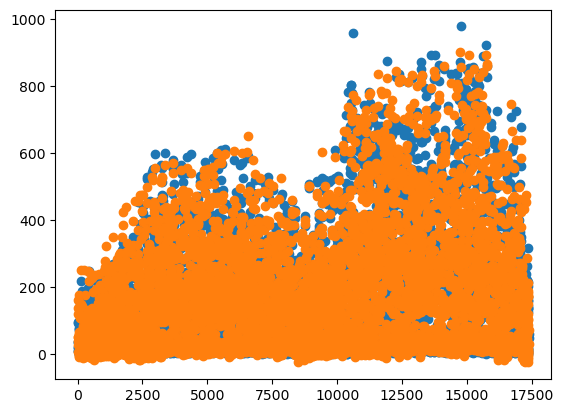

In [57]:
plt.scatter(y_test.index,np.ravel(y_test))
plt.scatter(X_test.index, pred_final3)
plt.show()

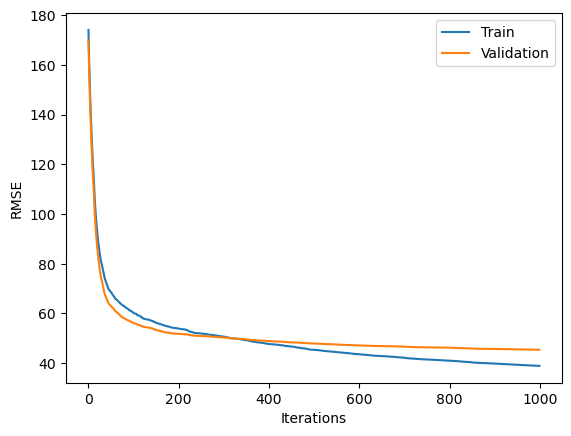

In [58]:
plt.plot(range(0,1000),model3.evals_result_['learn']['RMSE'], label = 'Train')
plt.plot(range(0,1000),model3.evals_result_['validation']['RMSE'], label = 'Validation')
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.legend()
plt.show()

This method performs very similarly to XGBoost. It does perform just slightly worse with an RMSE of 42.4 and a r_2 score of .945. This model does take much longer to execute as well. Looking at the RMSE Vs. Iterations plot we can also see that the validation set converged much quicker than the training data. This shows that the model was good at predicting external data at a small number of iterations.


Overall, the best model was XGBoost as it provided the most accurate predictions, and ran relatively fast compared to similar performers.

We were able to answer both of our questions. We found that XGBoost is the most accurate and efficient method to model this dataset, and it has an accuracy of about 94.7%.

## <center> Reference
Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.
   
  
